<a href="https://colab.research.google.com/github/zjzsu2000/CMPE258/blob/master/assignment3/keras_based_models_for_classifying_using_CNN_planet_amazon_data_set_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#keras based models for classifying using CNN planet amazon data set 

## load the Data

ref: 

1.   https://www.kaggle.com/general/74235
2.  https://www.kaggle.com/nikitarom/planets-dataset

In [0]:
! pip install -q --upgrade kaggle 

from google.colab import files
files.upload()

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list
! kaggle competitions download -c 'planet-understanding-the-amazon-from-space'
! kaggle datasets download nikitarom/planets-dataset


In [0]:
!unzip planets-dataset.zip
!ls planet/planet/

## multi classes classification

In [0]:
import pandas as pd

path = "planet/planet/"
data = pd.read_csv('planet/planet/train_classes.csv')


In [6]:
data.head(10)

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road
5,train_5,haze primary water
6,train_6,agriculture clear cultivation primary water
7,train_7,haze primary
8,train_8,agriculture clear cultivation primary
9,train_9,agriculture clear cultivation primary road


In [0]:
import cv2
import tqdm
import numpy as np
import matplotlib.pyplot as plt

###get the train dataset and labels_dic

In [0]:
flatten = lambda l: [item for sublist in l for item in sublist]
labels=set(flatten([l.split(' ') for l in data['tags'].values]))
labels_dic = {l: i for i, l in enumerate(list(labels))}

In [10]:
labels_dic

{'agriculture': 9,
 'artisinal_mine': 14,
 'bare_ground': 3,
 'blooming': 11,
 'blow_down': 0,
 'clear': 8,
 'cloudy': 7,
 'conventional_mine': 16,
 'cultivation': 6,
 'habitation': 2,
 'haze': 13,
 'partly_cloudy': 10,
 'primary': 12,
 'road': 5,
 'selective_logging': 1,
 'slash_burn': 15,
 'water': 4}

In [27]:
X_train = []
y_train = []


for filename, labels in tqdm.tqdm(data.values, miniters=100):    
    image = cv2.imread(path + "train-jpg/" + filename + ".jpg")
    targets = np.zeros(17)
    for label in labels.split(' '):
        targets[labels_dic[label]] = 1   
    X_train.append(cv2.resize(image, (64, 64)))
    y_train.append(targets)


100%|██████████| 40479/40479 [00:58<00:00, 695.92it/s]


In [31]:
len(X_train)

40479

In [32]:
X_train[0]

array([[[101, 109,  92],
        [108, 114, 102],
        [104, 111,  97],
        ...,
        [105, 111,  94],
        [102, 106,  87],
        [103, 109,  95]],

       [[105, 108,  94],
        [104, 113,  96],
        [107, 112,  96],
        ...,
        [102, 109,  93],
        [106, 114,  95],
        [101, 107,  87]],

       [[104, 108,  93],
        [104, 108,  94],
        [106, 113,  98],
        ...,
        [101, 106,  86],
        [103, 109,  93],
        [ 99, 106,  85]],

       ...,

       [[105, 113,  96],
        [105, 110,  91],
        [106, 108,  93],
        ...,
        [102, 110,  92],
        [104, 110,  91],
        [106, 110,  90]],

       [[106, 115,  97],
        [105, 112,  92],
        [107, 111,  90],
        ...,
        [105, 113,  96],
        [105, 107,  87],
        [105, 107,  89]],

       [[108, 112,  95],
        [109, 115, 100],
        [105, 114,  95],
        ...,
        [103, 110,  91],
        [106, 113,  95],
        [107, 110,  91]]

###Scale

In [0]:
X_train = np.array(X_train, np.float16) / 255
y_train = np.array(y_train, np.uint8)

In [34]:
X_train[0].shape

(64, 64, 3)

In [35]:
X_train[0]

array([[[0.396 , 0.4275, 0.3608],
        [0.4236, 0.447 , 0.4   ],
        [0.408 , 0.4353, 0.3804],
        ...,
        [0.4119, 0.4353, 0.3687],
        [0.4   , 0.4158, 0.341 ],
        [0.4038, 0.4275, 0.3726]],

       [[0.4119, 0.4236, 0.3687],
        [0.408 , 0.443 , 0.3765],
        [0.4197, 0.4392, 0.3765],
        ...,
        [0.4   , 0.4275, 0.3647],
        [0.4158, 0.447 , 0.3726],
        [0.396 , 0.4197, 0.341 ]],

       [[0.408 , 0.4236, 0.3647],
        [0.408 , 0.4236, 0.3687],
        [0.4158, 0.443 , 0.3843],
        ...,
        [0.396 , 0.4158, 0.3372],
        [0.4038, 0.4275, 0.3647],
        [0.3882, 0.4158, 0.3333]],

       ...,

       [[0.4119, 0.443 , 0.3765],
        [0.4119, 0.4314, 0.357 ],
        [0.4158, 0.4236, 0.3647],
        ...,
        [0.4   , 0.4314, 0.3608],
        [0.408 , 0.4314, 0.357 ],
        [0.4158, 0.4314, 0.353 ]],

       [[0.4158, 0.451 , 0.3804],
        [0.4119, 0.4392, 0.3608],
        [0.4197, 0.4353, 0.353 ],
        .

###show the pic

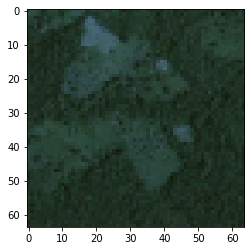

In [22]:
image_8 = np.array(X_train[8],dtype='float64')
plt.imshow(image_8)
plt.show()

In [23]:
y_train[8]

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0], dtype=uint8)

###train_test_split to get the val-data(20%)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

NameError: ignored

### Function to create sequential model
#### Add 3 convolutional layers(relu),BatchNormalization,apply dropout 0.7,sigmoid activation function for output.

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout,Flatten,Dense
import tensorflow as tf
import datetime
from keras.callbacks import EarlyStopping, TensorBoard


def create_model():
    model = Sequential([Conv2D(32, kernel_size=(3,3), activation='relu', 
                                input_shape=(64, 64, 3)),
                        MaxPooling2D(),
                        Dropout(0.7),
                        Conv2D(64, kernel_size=(3,3), activation='relu'),
                        MaxPooling2D(),
                        Dropout(0.7),
                        Conv2D(128, kernel_size=(3,3), activation='relu'),
                        MaxPooling2D(),
                        Dropout(0.7),
                        Flatten(),
                        Dense(1024, activation='relu'),Dropout(0.7),
                        Dense(17,activation='sigmoid')
                        ])
    return model

Using TensorFlow backend.


In [10]:
model = create_model()
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)      

## create tensorboard and upload

ref:
> https://www.tensorflow.org/tensorboard/get_started

> https://tensorboard.dev/#get-started





In [11]:
log_dir1="logs/3conv-0.7dropout-batchnorm-sigmoid-adam-binary_crossentropy-20epochs" 
tensorboard_callback = TensorBoard(log_dir=log_dir1, histogram_freq=1)

history1=model.fit(x=X_train,y=y_train, validation_data=(X_val, y_val), 
          callbacks=[tensorboard_callback],epochs=20)

NameError: ignored

In [0]:
!tensorboard dev upload --logdir ./logs \
  --name " CNN planet amazon data set" \
  --description "Training results from https://colab.research.google.com/drive/1k2eScuaUK1prBPbWf1EqRJ6PwrbUfjx4"

2020-05-02 06:26:05.620014: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Data for the "graphs" plugin is now uploaded to TensorBoard.dev! Note that uploaded data is public. If you do not want to upload data for this plugin, use the "--plugins" command line argument.
Upload started and will continue reading any new data as it's added
to the logdir. To stop uploading, press Ctrl-C.
View your TensorBoard live at: https://tensorboard.dev/experiment/oQPng8DkR5Gn2w1sYBRbyA/
E0502 06:26:08.970737 140019514959744 uploader.py:770] Attempted to re-upload existing blob.  Skipping.
E0502 06:26:14.923841 140019514959744 uploader.py:770] Attempted to re-upload existing blob.  Skipping.
E0502 06:26:18.966506 140019514959744 uploader.py:770] Attempted to re-upload existing blob.  Skipping.

Upload stopped. View your TensorBoard at https://tensorboard.dev/experiment/oQPng8DkR5Gn2w1sYBRbyA/
^C
